In [1]:
import matplotlib.pyplot as plt
import fdtd
import fdtd.backend as bd

fdtd.set_backend("numpy")

In [2]:
WAVELENGTH = 1550e-9
SPEED_LIGHT: float = 299_792_458.0  # [m/s] speed of light

In [3]:
grid = fdtd.Grid(
    (2.5e-5, 1.5e-5, 1),
    grid_spacing=0.1 * WAVELENGTH,
    permittivity=1.0,
    permeability=1.0,
)

In [4]:
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
# grid[:, :, 0] = fdtd.PeriodicBoundary(name="zbounds")

In [5]:
grid[80, 40, 0] = fdtd.PointSource(
    period=WAVELENGTH / SPEED_LIGHT, name="pointsource",
)

In [6]:
grid.run(50, progress_bar=False)

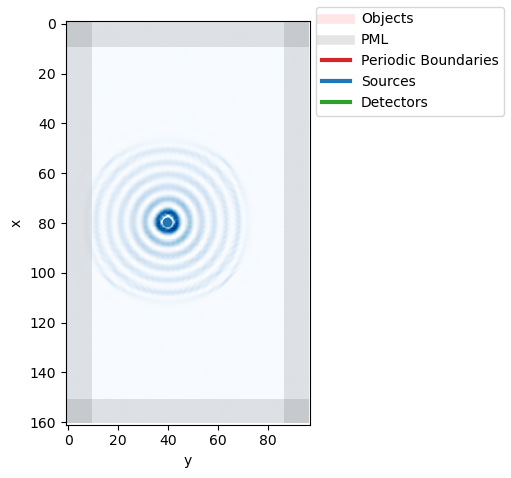

In [7]:
plt.figure()
grid.visualize(z=0)